In [176]:
%matplotlib inline


In [177]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import scipy.stats as sts
import matplotlib as mpl

# Import your data into a Pandas DataFrame.

In [178]:
ride_csv = Path("/Users/jeremy/Docs/OSU_Bootcamp/Mod_5_PyBer/PyBer_Analysis/Resources/ride_data.csv")
city_csv = Path("/Users/jeremy/Docs/OSU_Bootcamp/Mod_5_PyBer/PyBer_Analysis/Resources/city_data.csv")

city_df = pd.read_csv(city_csv)
ride_df = pd.read_csv(ride_csv)

In [179]:
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [180]:
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


##### Inspecting city_df

In [181]:
# Get all the rows that contain null values.
city_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [182]:
# Make sure the driver_count column has an integer data type.
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [183]:
# Find out how many data points there are for each type of city.
city_df['type'].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

##### Inspect ride_df

In [184]:
# Get all the rows that contain null values.
ride_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [185]:
# Make sure the driver_count column has an integer data type.
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

### Merge DataFrames

In [186]:
Pyber_df = pd.merge(ride_df,city_df,how='left',on=['city','city'])

Pyber_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


### Create new dataframes to isolate data

In [187]:
urban_df = Pyber_df[Pyber_df['type']=='Urban']
urban_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [188]:
suburban_df = Pyber_df[Pyber_df['type']=='Suburban']
suburban_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [189]:
rural_df = Pyber_df[Pyber_df['type']=="Rural"]
rural_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


### Determine the mean, median, and mode for the following:


### The total number of rides for each city type.


In [190]:
rural_rides = rural_df.groupby('city').count()['ride_id']

rural_rides


city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [191]:
urban_rides = urban_df.groupby('city').count()['ride_id']
urban_rides

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [192]:
suburban_rides = suburban_df.groupby('city').count()['ride_id']
suburban_rides

city
Barronchester         16
Bethanyland           18
Brandonfort           19
Colemanland           22
Davidfurt             17
East Aaronbury         9
East Danielview       17
East Kentstad         13
East Marymouth        27
Grayville             15
Josephside            27
Lake Ann              12
Lake Omar             14
Lake Robertside       25
Lake Scott            18
Lewishaven            12
Lewisland             17
Mezachester           17
Myersshire            16
New Olivia            17
New Raymond           22
New Shannonberg       17
Nicolechester         19
North Jeffrey         13
North Richardhaven    14
North Timothy         15
Port Shane            19
Rodriguezview         15
Sotoville             11
South Brenda          24
South Teresa          22
Veronicaberg          17
Victoriaport          14
West Hannah           21
West Kimmouth         20
Williamsonville       14
Name: ride_id, dtype: int64

### The average fares for each city type.


In [193]:
rural_fare = rural_df.groupby('city').mean()['fare']
rural_fare


city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64

In [194]:
urban_fare = urban_df.groupby('city').mean()['fare']
urban_fare


city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [195]:
suburban_fare = suburban_df.groupby('city').mean()['fare']
suburban_fare

city
Barronchester         36.422500
Bethanyland           32.956111
Brandonfort           35.437368
Colemanland           30.894545
Davidfurt             31.995882
East Aaronbury        25.661111
East Danielview       31.560588
East Kentstad         29.823077
East Marymouth        30.835185
Grayville             27.763333
Josephside            32.858148
Lake Ann              30.890000
Lake Omar             28.075000
Lake Robertside       31.262000
Lake Scott            31.886111
Lewishaven            25.241667
Lewisland             34.614118
Mezachester           30.760000
Myersshire            30.203125
New Olivia            34.054118
New Raymond           27.961818
New Shannonberg       28.378235
Nicolechester         30.909474
North Jeffrey         29.242308
North Richardhaven    24.704286
North Timothy         31.262000
Port Shane            31.077895
Rodriguezview         30.745333
Sotoville             31.980000
South Brenda          33.964583
South Teresa          31.220455
Ver

### The average number of drivers for each city type.


In [196]:
rural_driver = rural_df.groupby('city').mean()["driver_count"]
rural_driver

city
Bradshawfurt         7.0
Garzaport            7.0
Harringtonfort       4.0
Jessicaport          1.0
Lake Jamie           4.0
Lake Latoyabury      2.0
Michaelberg          6.0
New Ryantown         2.0
Newtonview           1.0
North Holly          8.0
North Jaime          1.0
Penaborough          6.0
Randallchester       9.0
South Jennifer       7.0
South Marychester    1.0
South Saramouth      7.0
Taylorhaven          1.0
West Heather         4.0
Name: driver_count, dtype: float64

In [197]:
urban_driver = urban_df.groupby('city').mean()['driver_count']
urban_driver.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [198]:
suburban_driver = suburban_df.groupby('city').mean()['driver_count']
suburban_driver.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

### Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the average number of drivers for each city type.


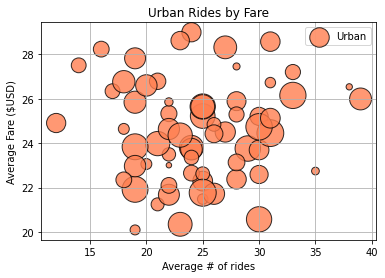

In [199]:
fig, ax = plt.subplots()

ax.scatter(urban_rides,urban_fare, s=urban_driver*10,c='coral',edgecolors="black",alpha=.8,linewidth=1,label='Urban')

ax.set_title("Urban Rides by Fare")
ax.set_xlabel("Average # of rides")
ax.set_ylabel("Average Fare ($USD)")
ax.grid(True)
ax.legend()

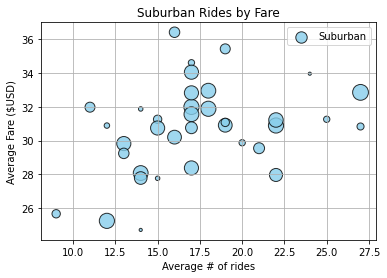

In [200]:
fig, ax = plt.subplots()


ax.scatter(suburban_rides,suburban_fare, s=suburban_driver*10,c='skyblue',edgecolors="black",alpha=.8,linewidth=1,label='Suburban')
ax.set_title("Suburban Rides by Fare")
ax.set_xlabel("Average # of rides")
ax.set_ylabel("Average Fare ($USD)")
ax.grid(True)
ax.legend()

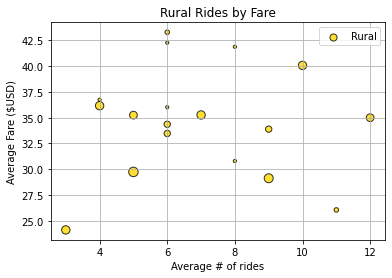

In [201]:
fig, ax = plt.subplots()

ax.scatter(rural_rides,rural_fare, s=rural_driver*10,c='gold',edgecolors="black",alpha=.8,linewidth=1,label='Rural')
ax.set_title("Rural Rides by Fare")
ax.set_xlabel("Average # of rides")
ax.set_ylabel("Average Fare ($USD)")
ax.grid(True)
ax.legend()

### Combine the Data into one Chart

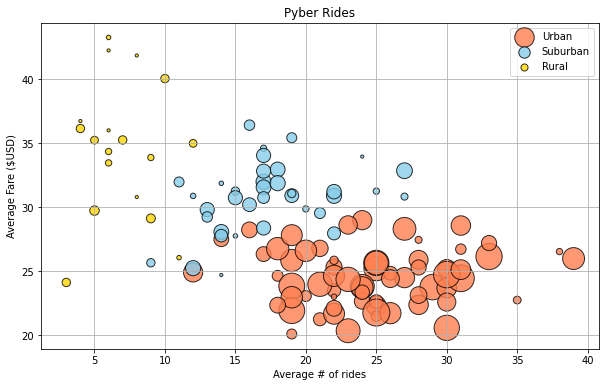

In [202]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(urban_rides,urban_fare, s=urban_driver*10,c='coral',edgecolors="black",alpha=.8,linewidth=1,label='Urban')
ax.scatter(suburban_rides,suburban_fare, s=suburban_driver*10,c='skyblue',edgecolors="black",alpha=.8,linewidth=1,label='Suburban')
ax.scatter(rural_rides,rural_fare, s=rural_driver*10,c='gold',edgecolors="black",alpha=.8,linewidth=1,label='Rural')
ax.set_title("Pyber Rides")
ax.set_xlabel("Average # of rides")
ax.set_ylabel("Average Fare ($USD)")
ax.grid(True)
ax.legend()
plt.show()



### Format the chart

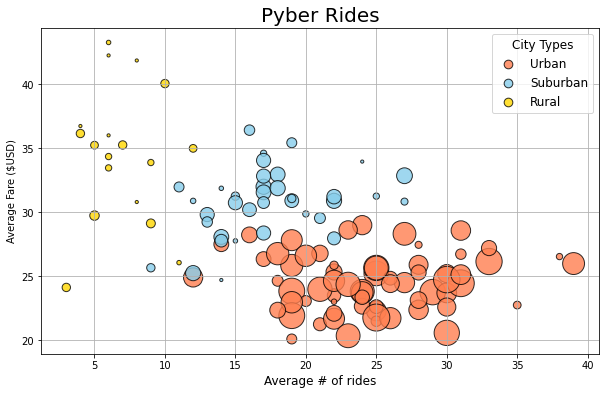

In [203]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(urban_rides,urban_fare, s=urban_driver*10,c='coral',edgecolors="black",alpha=.8,linewidth=1,label='Urban')
ax.scatter(suburban_rides,suburban_fare, s=suburban_driver*10,c='skyblue',edgecolors="black",alpha=.8,linewidth=1,label='Suburban')
ax.scatter(rural_rides,rural_fare, s=rural_driver*10,c='gold',edgecolors="black",alpha=.8,linewidth=1,label='Rural')
ax.set_title("Pyber Rides", fontsize=20)
ax.set_xlabel("Average # of rides",fontsize=12)
ax.set_ylabel("Average Fare ($USD)")
ax.grid(True)
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.show()

### Summary data for City Type DataFrames

In [204]:
urban_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [205]:
suburban_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [206]:
rural_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


### Gather Ride Data

In [207]:
urban_rides.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [208]:
suburban_rides.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [209]:
rural_rides.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [210]:
suburban_rides_mean = np.mean(suburban_rides)
print(f"The mean for the ride counts for suburban trips is {suburban_rides_mean:.2f}.")

suburban_rides_median = np.median(suburban_rides)
print(f"The median for the ride counts for suburban trips is {suburban_rides_median}.")

suburban_rides_mode = sts.mode(suburban_rides)
print(f"The mode for the ride counts for suburban trips is {suburban_rides_mode}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


/var/folders/3c/g5wntyv104dd1wgtv45cl7g00000gn/T/ipykernel_90577/3717618328.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  suburban_rides_mode = sts.mode(suburban_rides)


In [211]:
urban_rides_mean = np.mean(urban_rides)
print(f"The mean for the ride counts for urban trips is {urban_rides_mean:.2f}.")

urban_rides_mean = np.median(urban_rides)
print(f"The median for the ride counts for urban trips is {urban_rides_mean}.")

urban_rides_mean = sts.mode(urban_rides)
print(f"The mode for the ride counts for urban trips is {urban_rides_mean}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


/var/folders/3c/g5wntyv104dd1wgtv45cl7g00000gn/T/ipykernel_90577/3074641116.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  urban_rides_mean = sts.mode(urban_rides)


In [212]:
rural_rides_mean = np.mean(rural_rides)
print(f"The mean for the ride counts for rural trips is {rural_rides_mean:.2f}.")

rural_rides_median = np.median(rural_rides)
print(f"The median for the ride counts for rural trips is {rural_rides_median}.")

rural_rides_mode = sts.mode(rural_rides)
print(f"The mode for the ride counts for rural trips is {rural_rides_mode}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


/var/folders/3c/g5wntyv104dd1wgtv45cl7g00000gn/T/ipykernel_90577/2862118201.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  rural_rides_mode = sts.mode(rural_rides)


### Gather Fare Data

In [213]:
urban_fare_series = urban_df['fare']
urban_fare_series.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [214]:
rural_fare_series = rural_df['fare']
rural_fare_series.head()



2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [215]:
suburban_fare_series = suburban_df['fare']
suburban_fare_series.head()


1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [216]:

urban_fares_mean = np.mean(urban_fare_series)
print(f"The mean fare price for urban trips is ${urban_fares_mean:.2f}.")

urnab_fares_median = np.median(urban_fare_series)
print(f"The median fare price for urban trips is ${urnab_fares_median:.2f}.")

urban_fares_mode = sts.mode(urban_fare_series)
print(f"The mode fare price for urban trips is {urban_fares_mode}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


/var/folders/3c/g5wntyv104dd1wgtv45cl7g00000gn/T/ipykernel_90577/4246149474.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  urban_fares_mode = sts.mode(urban_fare_series)


In [217]:

suburban_fares_mean = np.mean(suburban_fare_series)
print(f"The mean fare price for suburban trips is ${suburban_fares_mean:.2f}.")

suburban_fares_median = np.median(suburban_fare_series)
print(f"The median fare price for suburban trips is ${suburban_fares_median:.2f}.")

suburban_fares_mode = sts.mode(suburban_fare_series)
print(f"The mode fare price for suburban trips is {suburban_fares_mode}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


/var/folders/3c/g5wntyv104dd1wgtv45cl7g00000gn/T/ipykernel_90577/2908842111.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  suburban_fares_mode = sts.mode(suburban_fare_series)


In [218]:

rural_fares_mean = np.mean(rural_fare_series)
print(f"The mean fare price for rural trips is ${rural_fares_mean:.2f}.")

rural_fares_median = np.median(rural_fare_series)
print(f"The median fare price for rural trips is ${rural_fares_median:.2f}.")

rural_fares_mode = sts.mode(rural_fare_series)
print(f"The mode fare price for rural trips is {rural_fares_mode}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


/var/folders/3c/g5wntyv104dd1wgtv45cl7g00000gn/T/ipykernel_90577/3581555470.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  rural_fares_mode = sts.mode(rural_fare_series)


### Gather Driver Data

In [219]:
urban_driver_series = urban_df['driver_count']
urban_driver_series.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [220]:
suburban_driver_series = suburban_df['driver_count']
suburban_driver_series.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [221]:
rural_driver_series = rural_df['driver_count']
rural_driver_series.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [222]:

urban_driver_mean = np.mean(urban_driver_series)
print(f"The mean driver count for urban trips is {urban_driver_mean:.2f}.")

urban_driver_median = np.median(urban_driver_series)
print(f"The median driver count for urban trips is {urban_driver_median:.2f}.")

urban_driver_mode = sts.mode(urban_driver_series)
print(f"The mode driver count for urban trips is {urban_driver_mode}.")

The mean driver count for urban trips is 36.68.
The median driver count for urban trips is 37.00.
The mode driver count for urban trips is ModeResult(mode=array([39]), count=array([86])).


/var/folders/3c/g5wntyv104dd1wgtv45cl7g00000gn/T/ipykernel_90577/2164053714.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  urban_driver_mode = sts.mode(urban_driver_series)


In [223]:

suburban_driver_mean = np.mean(suburban_driver_series)
print(f"The mean driver count for suburban trips is {suburban_driver_mean:.2f}.")

suburban_driver_median = np.median(suburban_driver_series)
print(f"The median driver count for suburban trips is {suburban_driver_median:.2f}.")

suburban_driver_mode = sts.mode(suburban_driver_series)
print(f"The mode driver count for suburban trips is {suburban_driver_mode}.")

The mean driver count for suburban trips is 13.71.
The median driver count for suburban trips is 16.00.
The mode driver count for suburban trips is ModeResult(mode=array([20]), count=array([79])).


/var/folders/3c/g5wntyv104dd1wgtv45cl7g00000gn/T/ipykernel_90577/3918387681.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  suburban_driver_mode = sts.mode(suburban_driver_series)


In [224]:

rural_driver_mean = np.mean(rural_driver_series)
print(f"The mean driver count for urban trips is {rural_driver_mean:.2f}.")

rural_driver_median = np.median(rural_driver_series)
print(f"The median driver count for urban trips is {rural_driver_median:.2f}.")

rural_driver_mode = sts.mode(rural_driver_series)
print(f"The mode driver count for urban trips is {rural_driver_mode}.")

The mean driver count for urban trips is 4.30.
The median driver count for urban trips is 4.00.
The mode driver count for urban trips is ModeResult(mode=array([1]), count=array([32])).


/var/folders/3c/g5wntyv104dd1wgtv45cl7g00000gn/T/ipykernel_90577/1005163257.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  rural_driver_mode = sts.mode(rural_driver_series)


### Create box-and-whisker plots

### Ride Count Plots

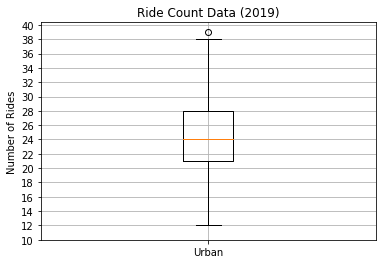

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [225]:
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_rides, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()
urban_rides.describe()

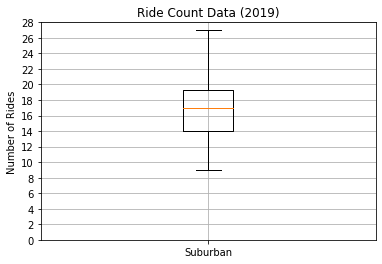

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [226]:
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_rides, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 30, step=2.0))
ax.grid()
plt.show()
suburban_rides.describe()

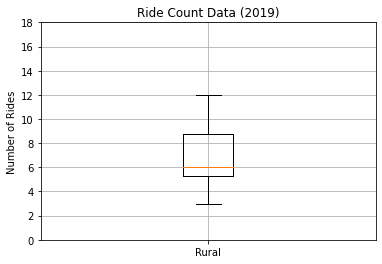

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [227]:
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_rides, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 20, step=2.0))
ax.grid()
plt.show()
rural_rides.describe()


### Combine Data into one Chart

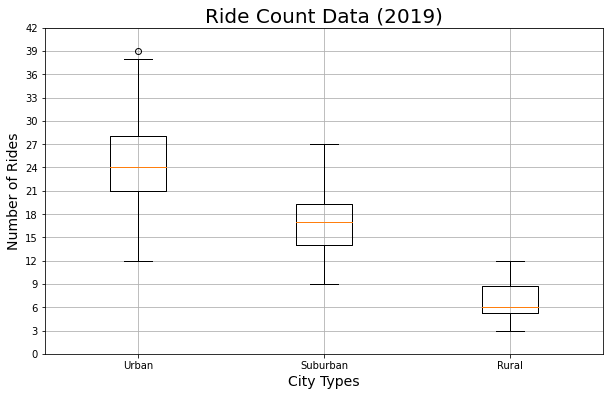

In [228]:
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_rides, suburban_rides, rural_rides]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")

plt.show()


### Fare Plots

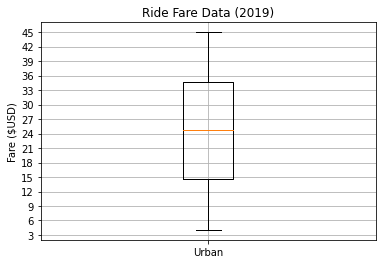

count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [229]:
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fare_series, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(3, 48, step=3.0))
ax.grid()
plt.show()
urban_fare_series.describe()

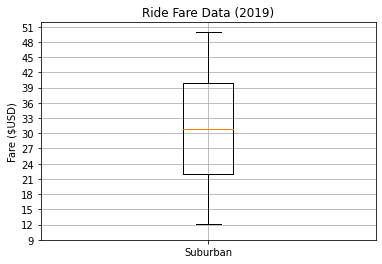

count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [230]:
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fare_series, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(9, 52, step=3.0))
ax.grid()
plt.show()
suburban_fare_series.describe()

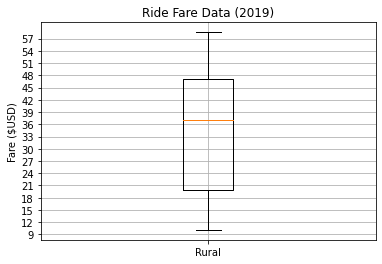

count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [231]:
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fare_series, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(9, 60, step=3.0))
ax.grid()
plt.show()
rural_fare_series.describe()

### Gather Data into one Chart

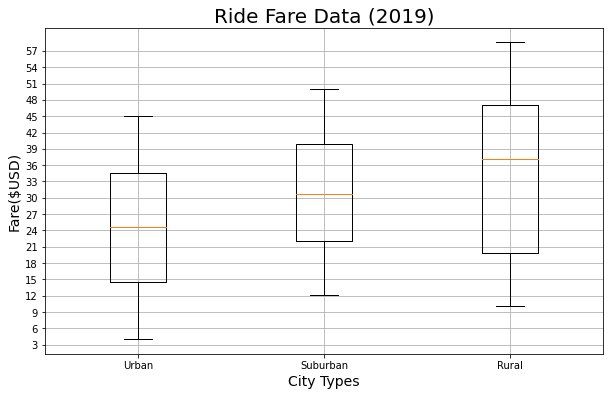

In [232]:
x_labels = ["Urban", "Suburban","Rural"]
fare_data = [urban_fare_series, suburban_fare_series, rural_fare_series]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(3, 60, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")

plt.show()

### Driver Data Plots

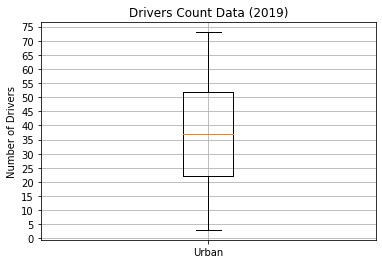

count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [233]:
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_driver_series, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Drivers Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0,80, step=5.0))
ax.grid()
plt.show()
urban_driver_series.describe()

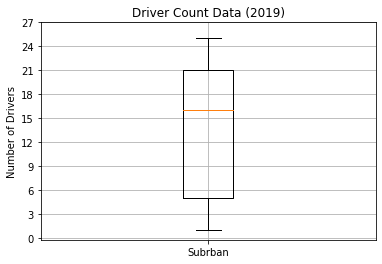

count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [234]:
x_labels = ["Subrban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_driver_series, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0,30, step=3.0))
ax.grid()
plt.show()
suburban_driver_series.describe()

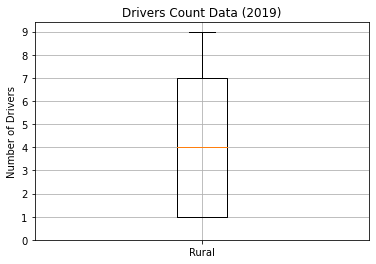

count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [235]:
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_driver_series, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Drivers Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0,10, step=1.0))
ax.grid()
plt.show()
rural_driver_series.describe()

### Gather into one Chart

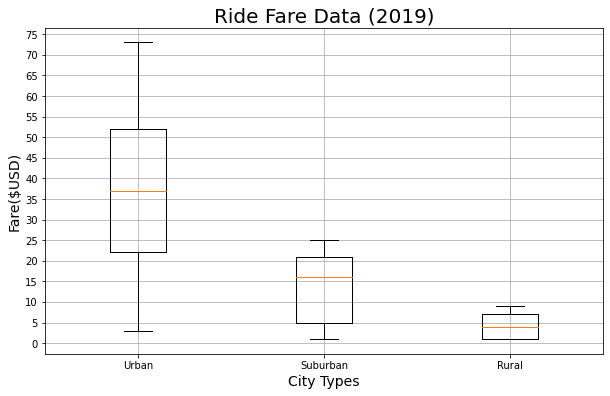

In [236]:
x_labels = ["Urban", "Suburban","Rural"]
fare_data = [urban_driver_series, suburban_driver_series, rural_driver_series]
explode_values = [0,0,.5]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")

plt.show()

### Create a pie chart that visualizes each of the following data for each city type:


### The percent of total fares.


Get the total fares for each city type.

In [237]:
'''
Long form way to complete this task:
fares_by_type = Pyber_df.groupby('type').sum()['fare']
total_fares = Pyber_df['fare'].sum()
percent_by_type = 100*(fares_by_type/total_fares)
'''
percent_by_type = 100*(Pyber_df.groupby('type').sum()['fare']/Pyber_df['fare'].sum())
percent_by_type

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

### Plot the Data

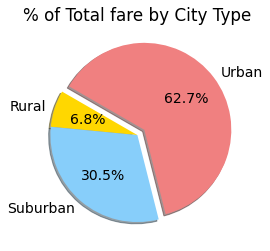

In [244]:
fig, ax = plt.subplots()
mpl.rcParams['font.size']=14
ax.pie(
    percent_by_type,
    explode=[0,0,.1],
    colors=["gold", "lightskyblue", "lightcoral"],
    labels=['Rural','Suburban','Urban'],
    autopct='%1.1f%%',
    startangle=150,
    shadow=True)
ax.set_title("% of Total fare by City Type")

plt.savefig("analysis/Fig5.png")
plt.show()

### The percent of total rides.


In [239]:
percent_count_rides = 100*(Pyber_df.groupby('type').count()['ride_id'] / Pyber_df['ride_id'].count())
percent_count_rides

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

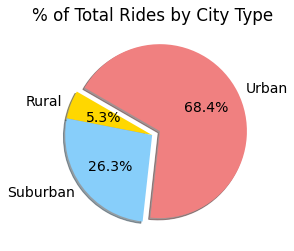

In [240]:
fig, ax = plt.subplots()

ax.pie(
    percent_count_rides,
    explode=[0,0,.1],
    colors=["gold", "lightskyblue", "lightcoral"],
    labels=['Rural','Suburban','Urban'],
    autopct='%1.1f%%',
    startangle=150,
    shadow=True)
ax.set_title("% of Total Rides by City Type")
mpl.rcParams['font.size']=14
plt.savefig("analysis/Fig6.png")
plt.show()

### The percent of total drivers.

In [241]:
percent_driver_type1 = 100*(city_df.groupby('type').sum()['driver_count'] / city_df['driver_count'].sum())
percent_driver_type1

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

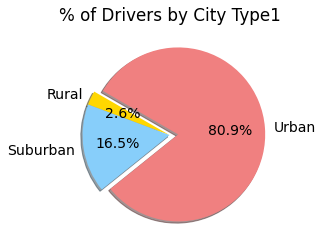

In [242]:
fig, ax = plt.subplots()

ax.pie(
    percent_driver_type1,
    explode=[0,0,.1],
    colors=["gold", "lightskyblue", "lightcoral"],
    labels=['Rural','Suburban','Urban'],
    autopct='%1.1f%%',
    startangle=150,
    shadow=True)
ax.set_title("% of Drivers by City Type1")
mpl.rcParams['font.size']=14
plt.savefig("analysis/Fig7.png")
plt.show()

In [246]:
percent_driver_type2 = 100*(Pyber_df.groupby('type').sum()['driver_count'] / Pyber_df['driver_count'].sum())
percent_driver_type2

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

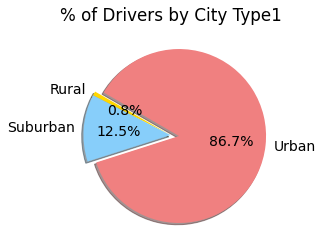

In [247]:
fig, ax = plt.subplots()

ax.pie(
    percent_driver_type2,
    explode=[0,0,.1],
    colors=["gold", "lightskyblue", "lightcoral"],
    labels=['Rural','Suburban','Urban'],
    autopct='%1.1f%%',
    startangle=150,
    shadow=True)
ax.set_title("% of Drivers by City Type1")
mpl.rcParams['font.size']=14
plt.savefig("analysis/Fig8.png")
plt.show()